In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### AND Gate as a DataFrame

In [2]:
import numpy as np

# Define the training data and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

### Perceptron without inbuilt

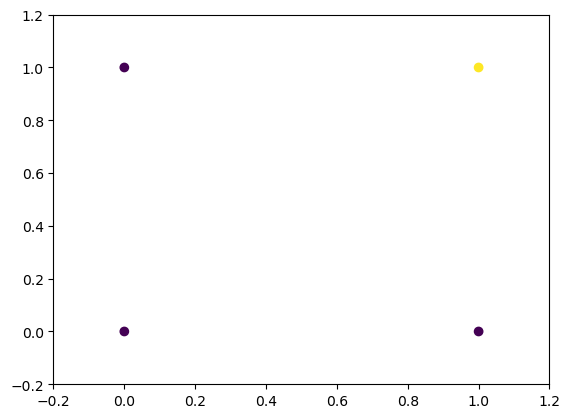

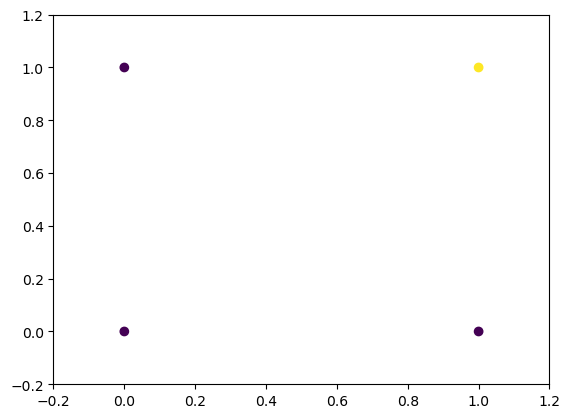

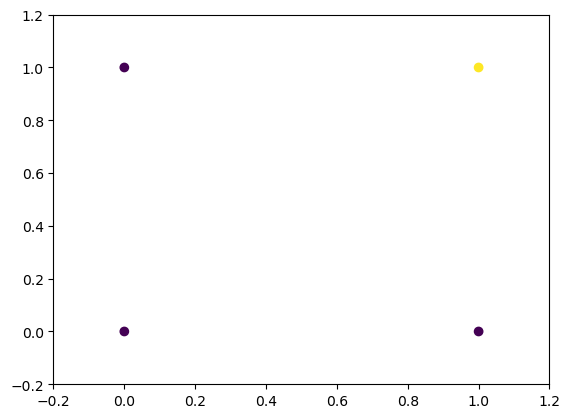

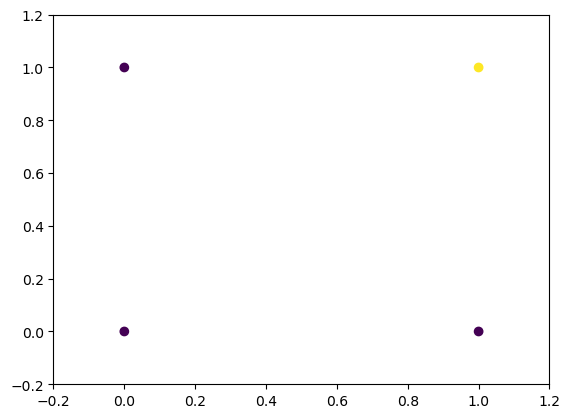

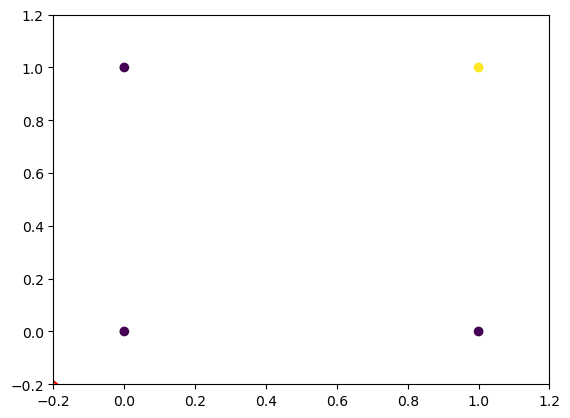

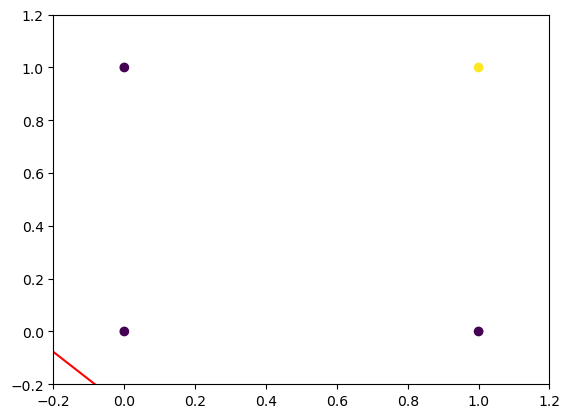

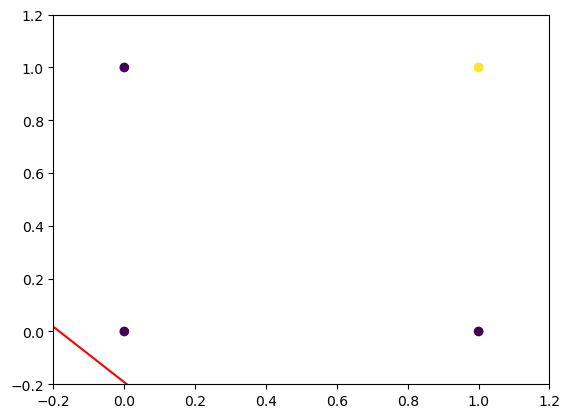

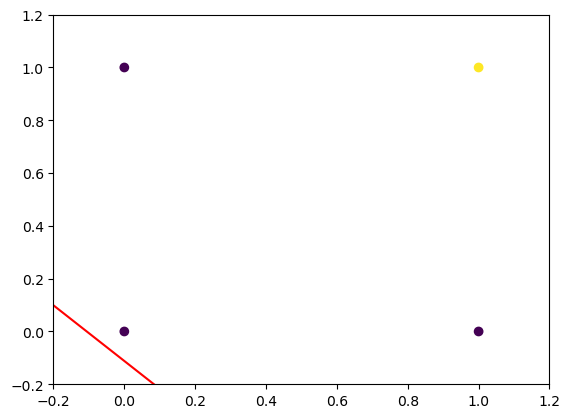

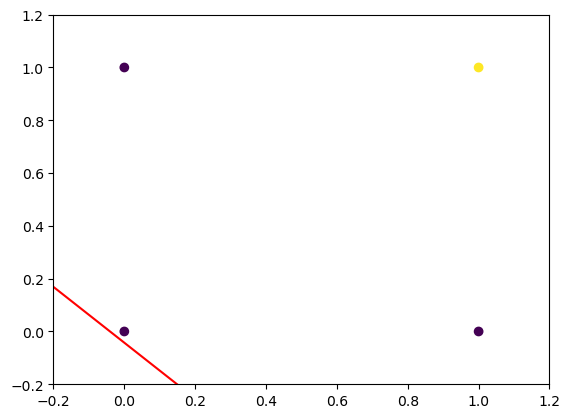

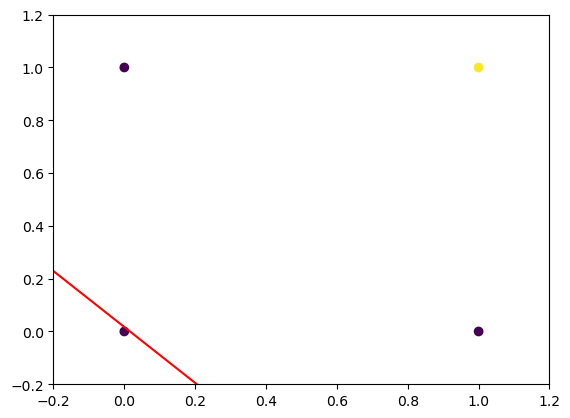

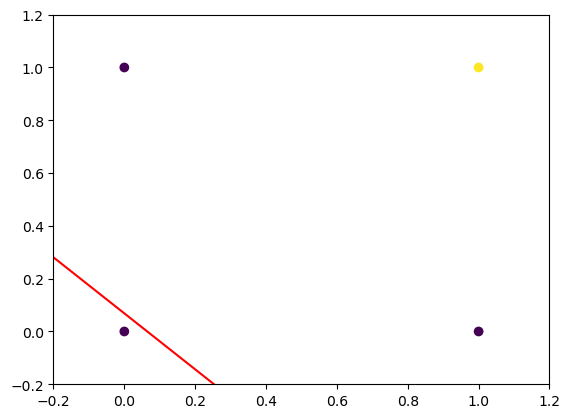

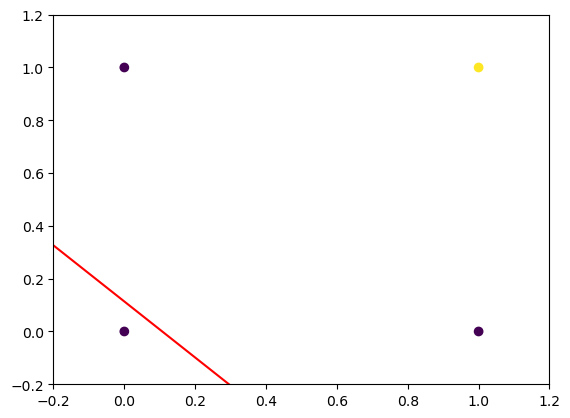

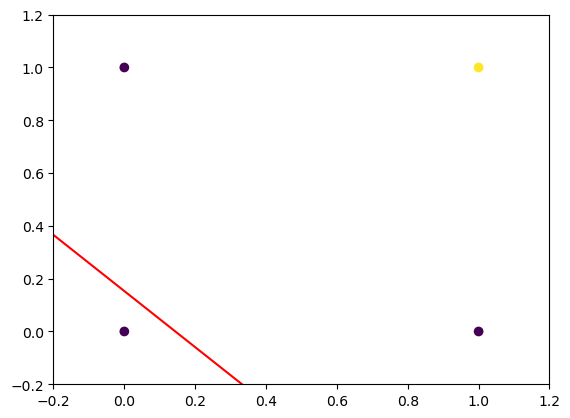

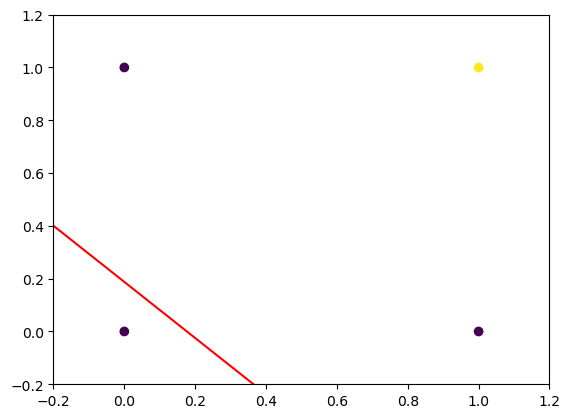

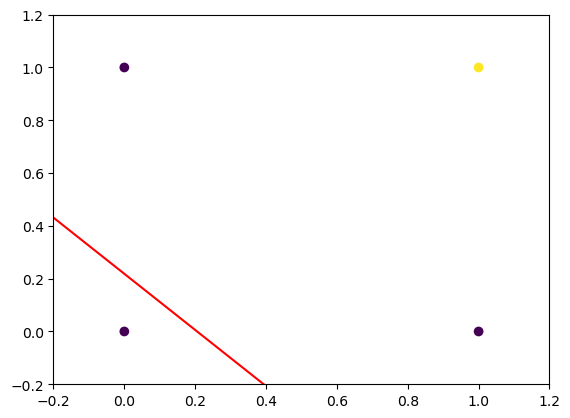

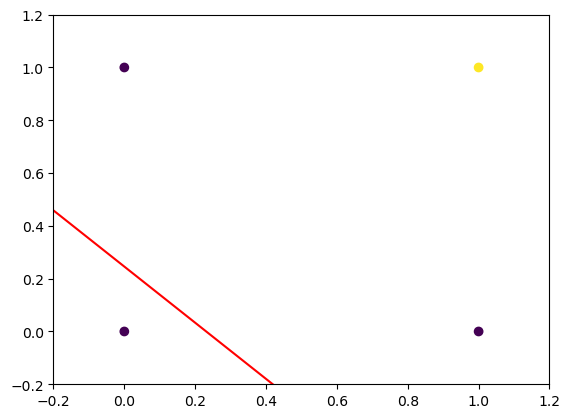

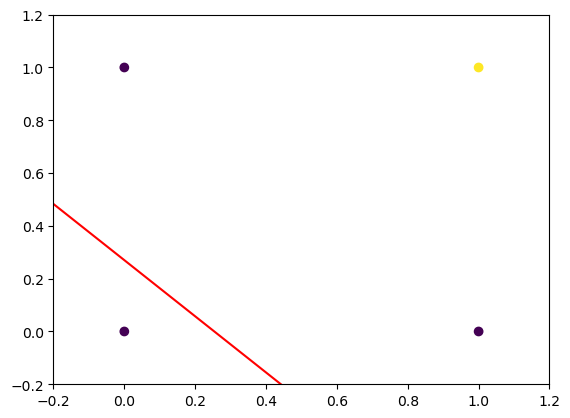

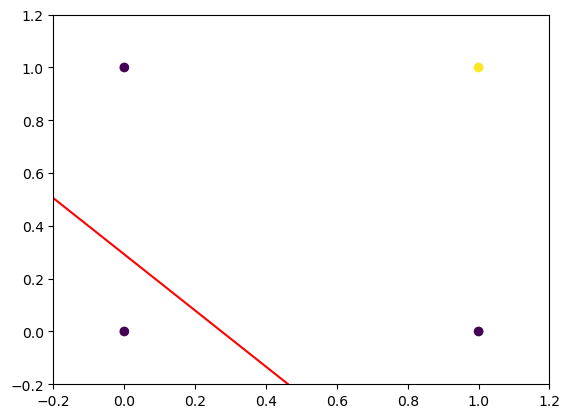

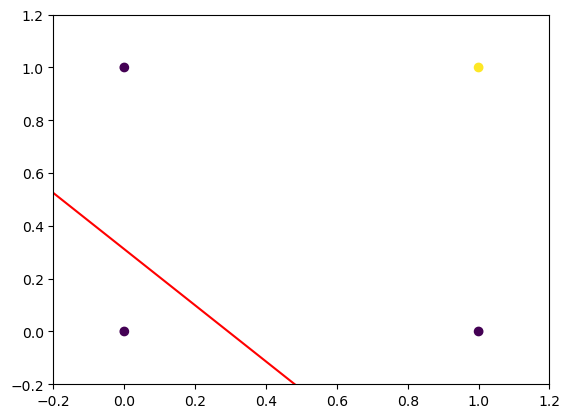

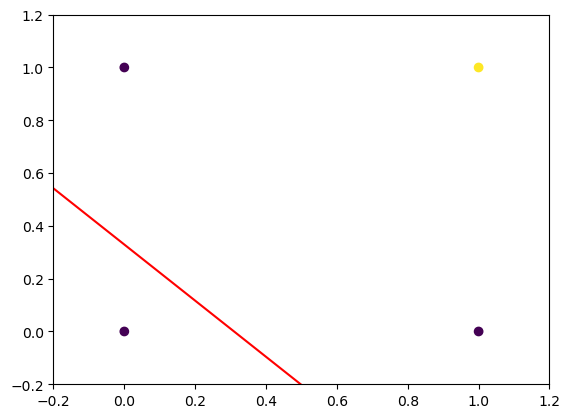

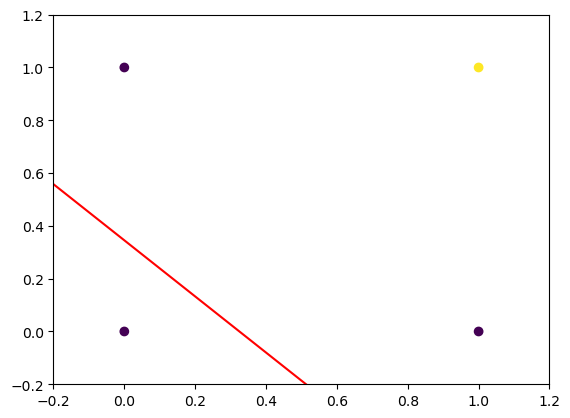

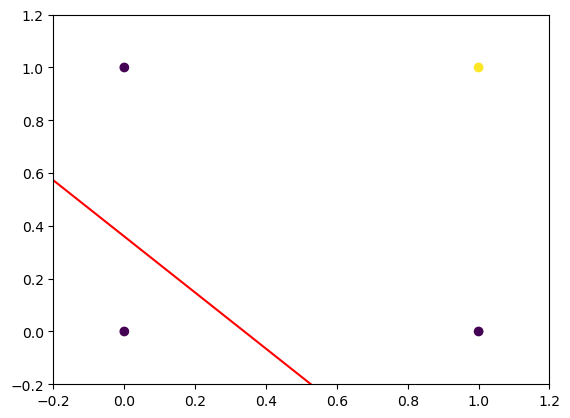

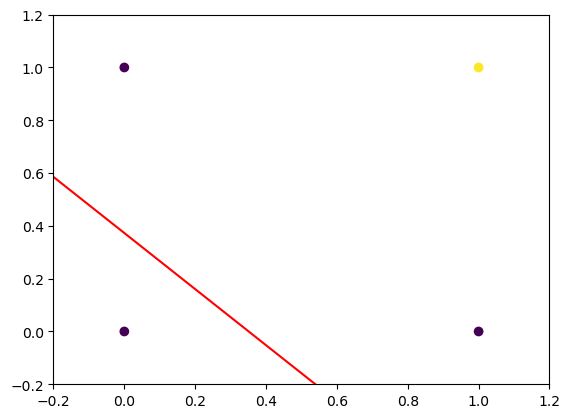

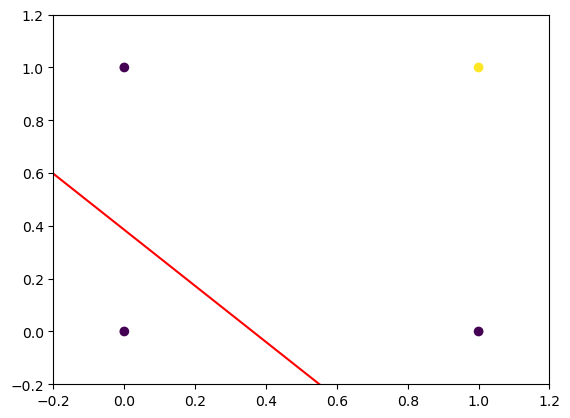

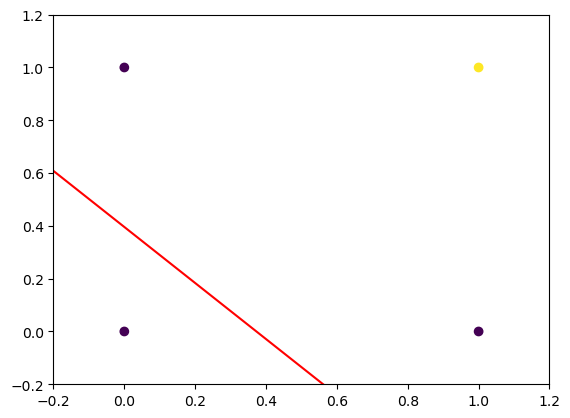

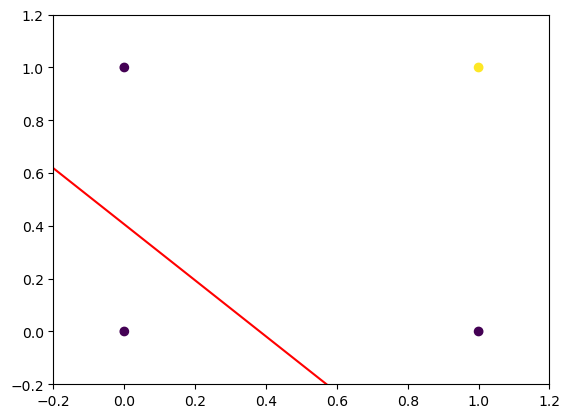

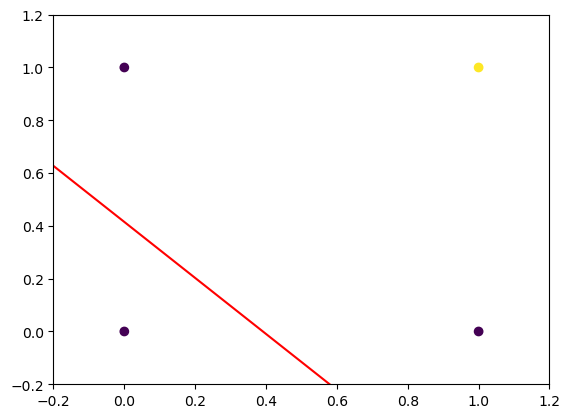

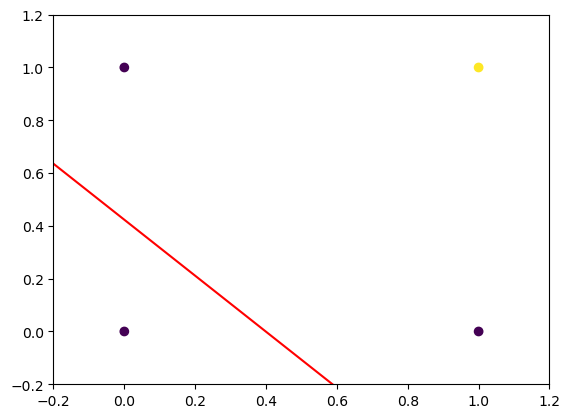

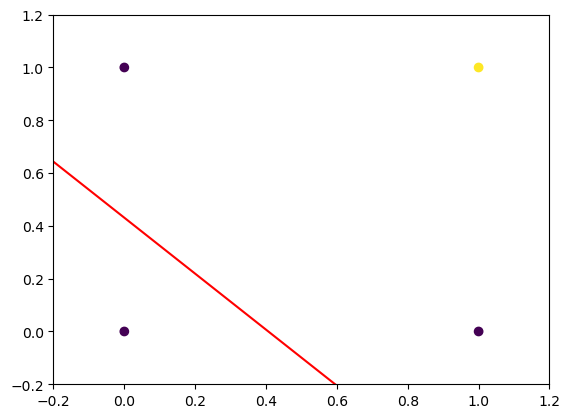

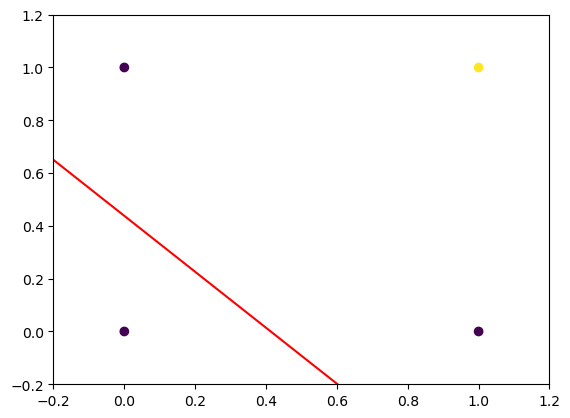

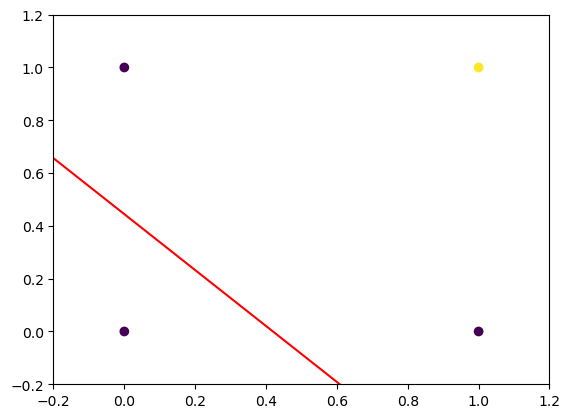

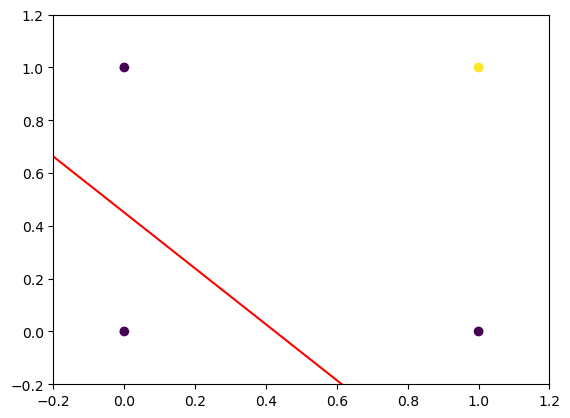

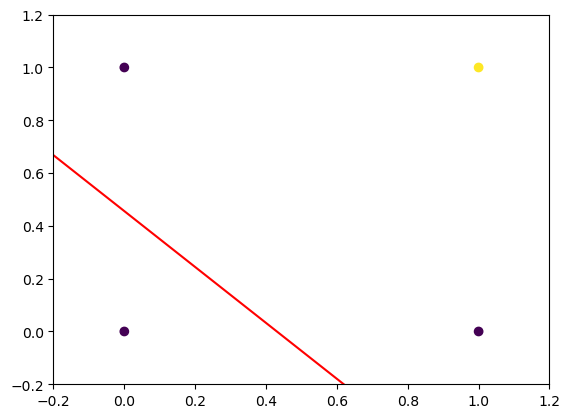

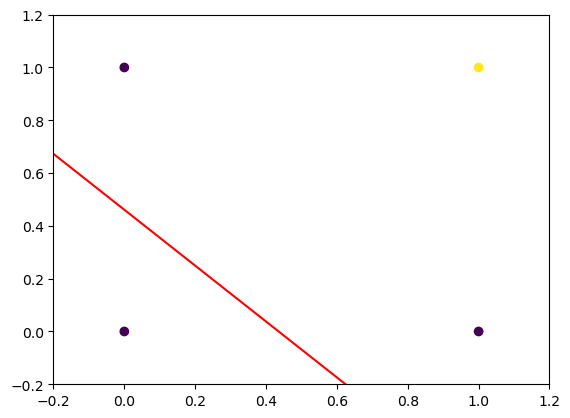

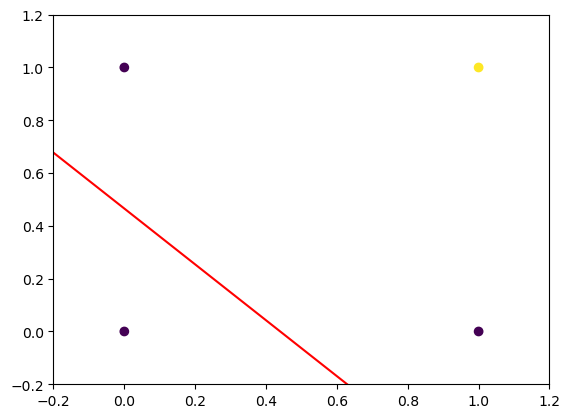

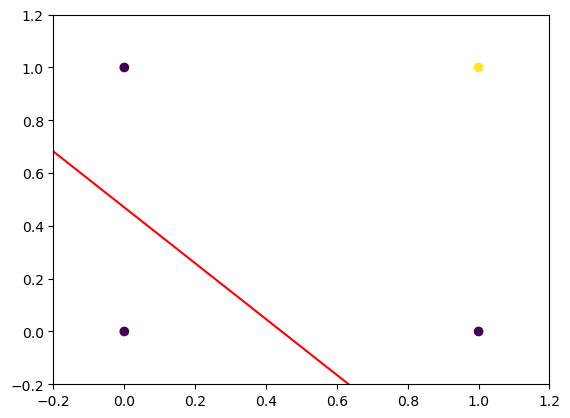

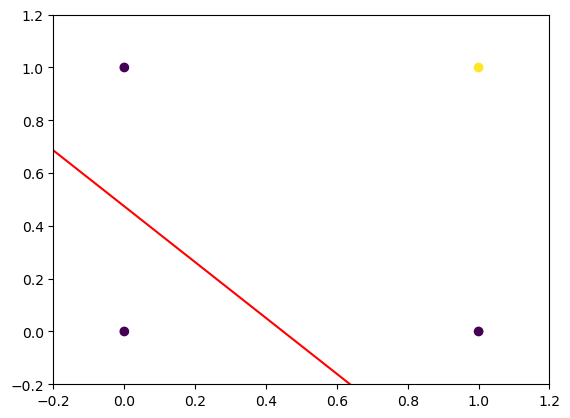

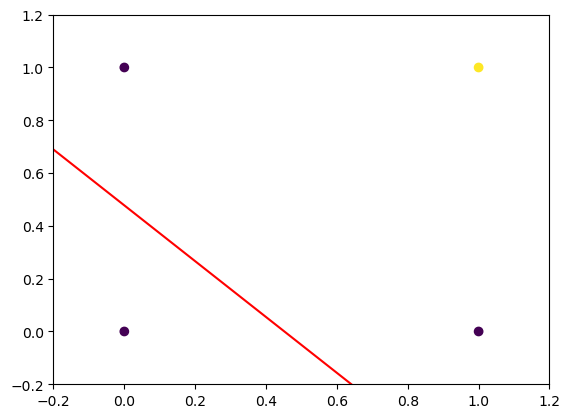

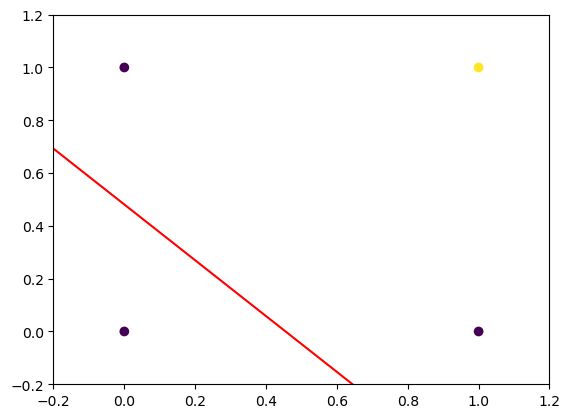

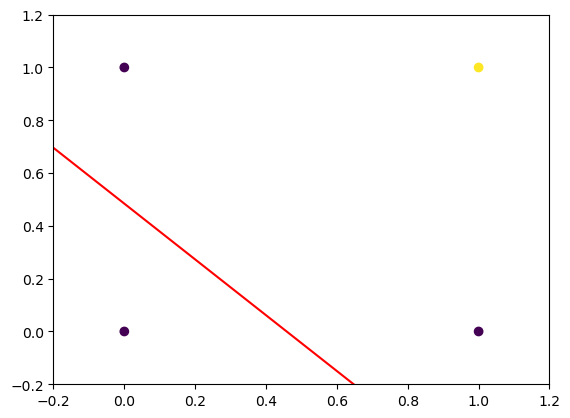

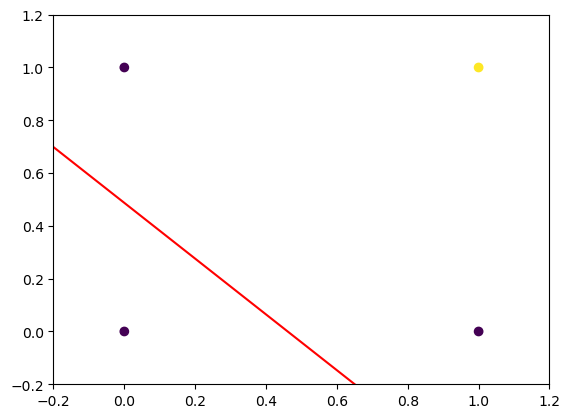

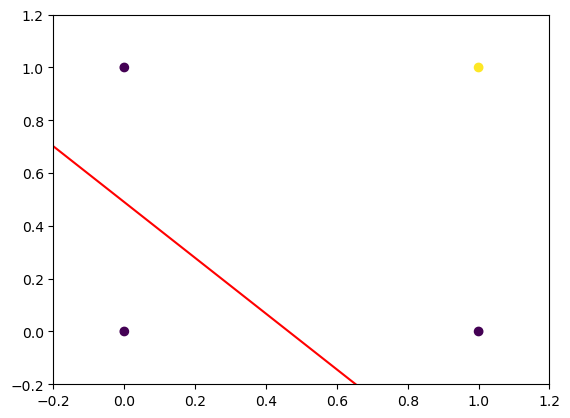

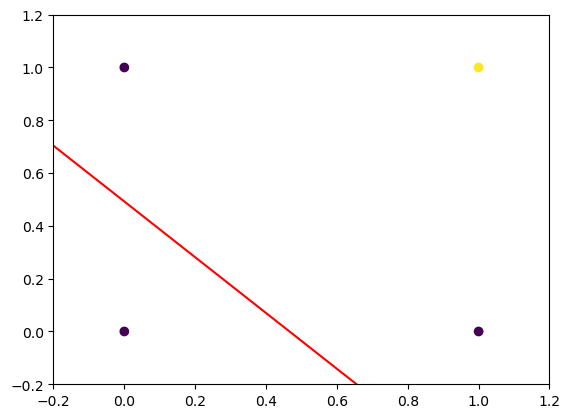

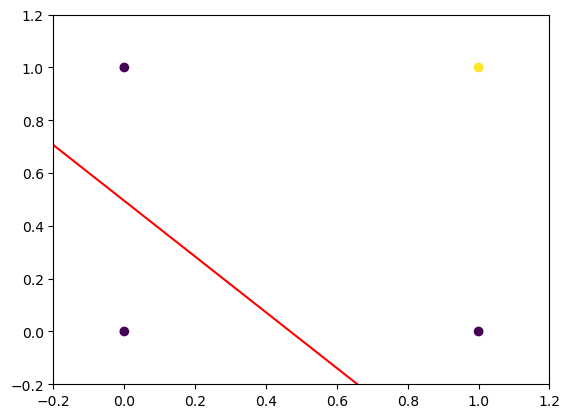

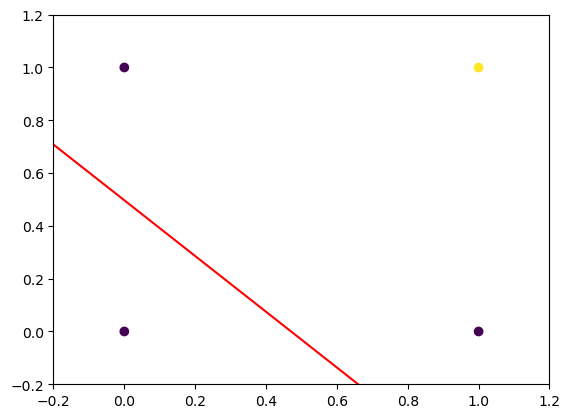

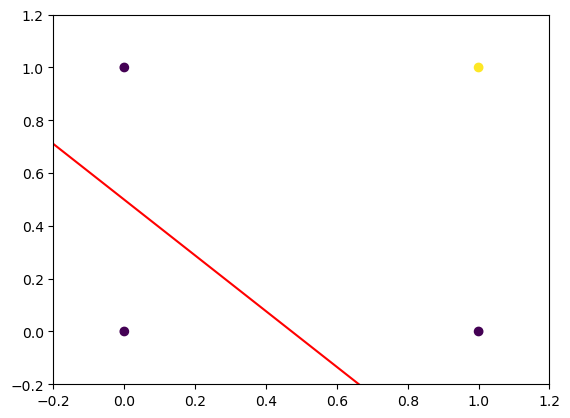

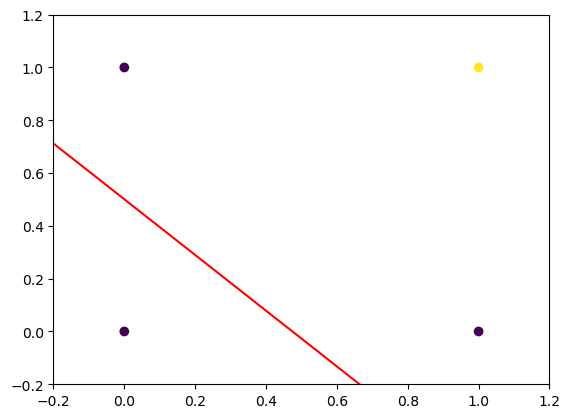

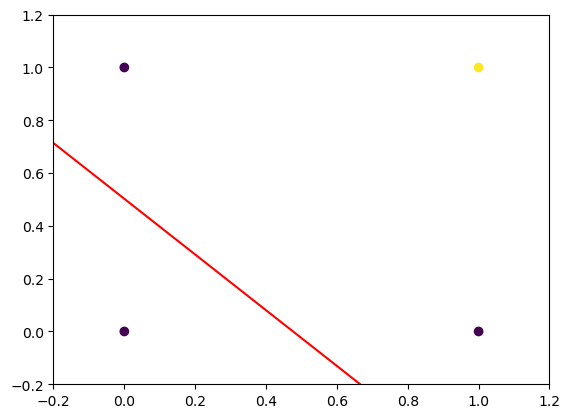

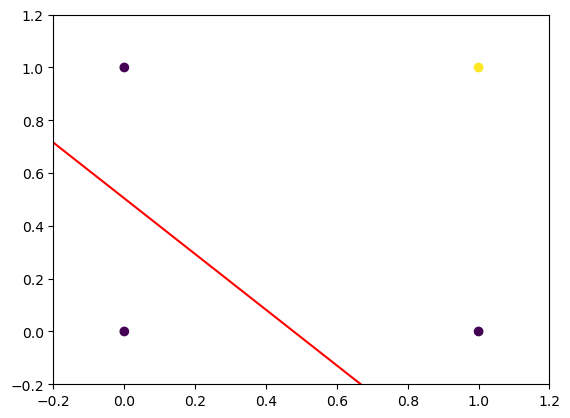

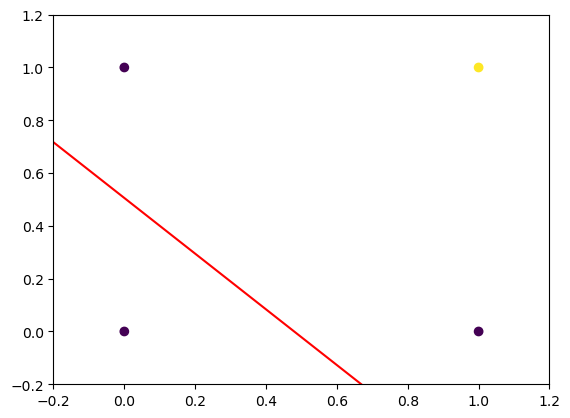

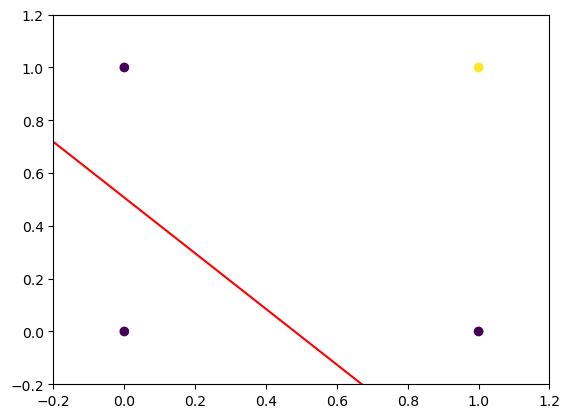

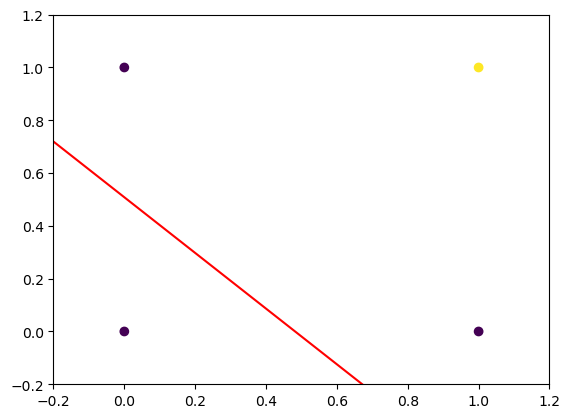

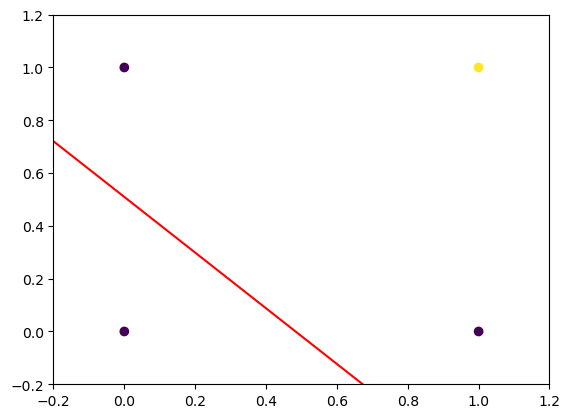

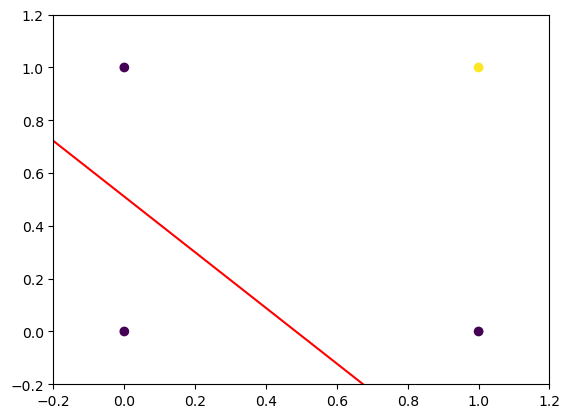

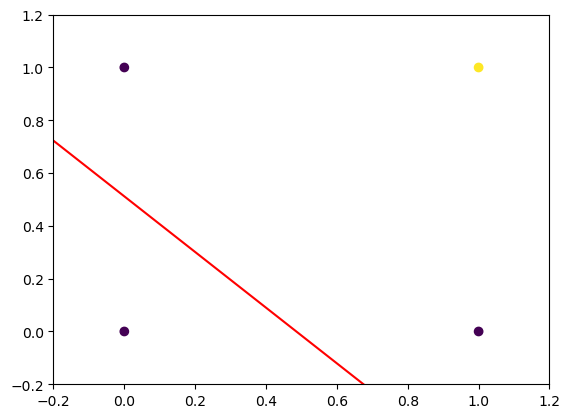

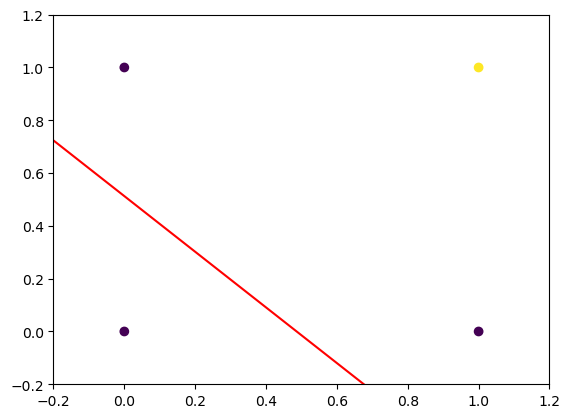

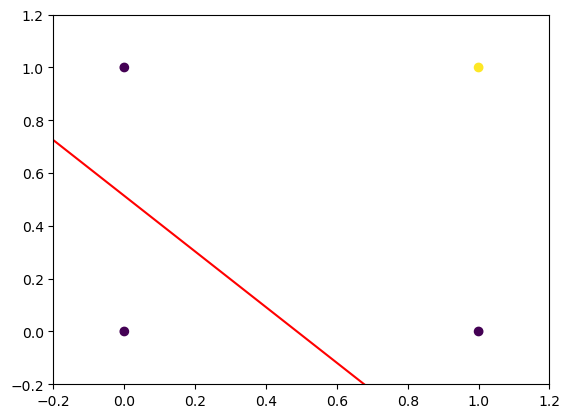

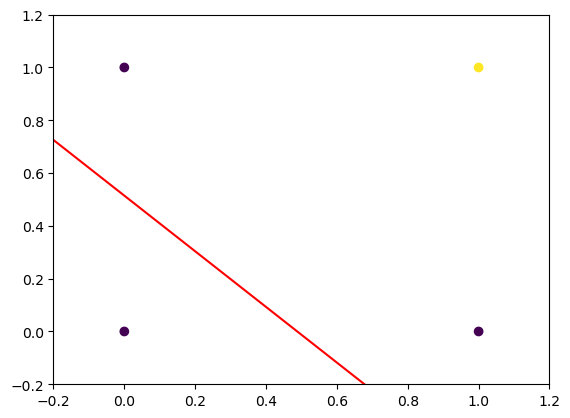

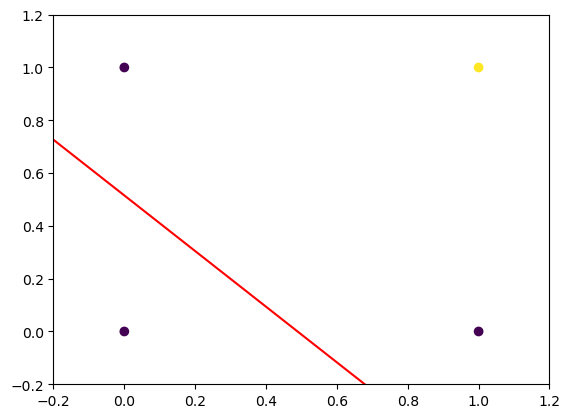

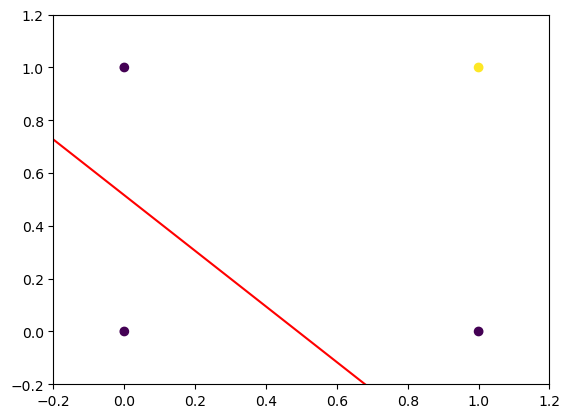

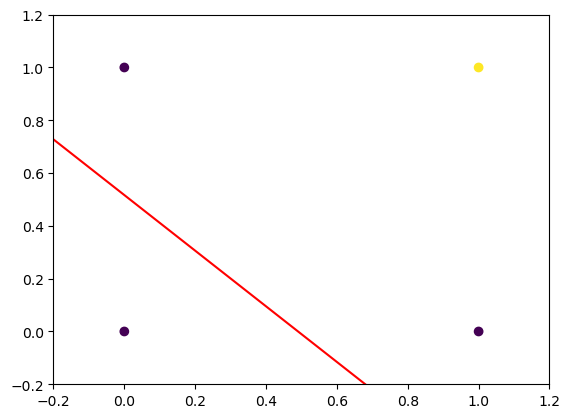

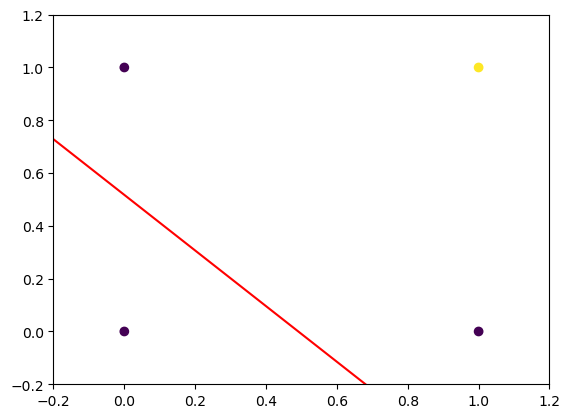

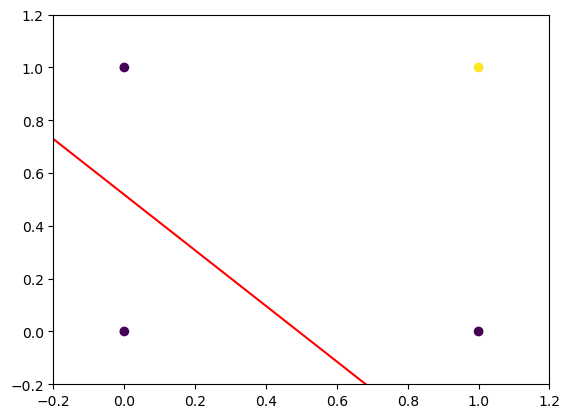

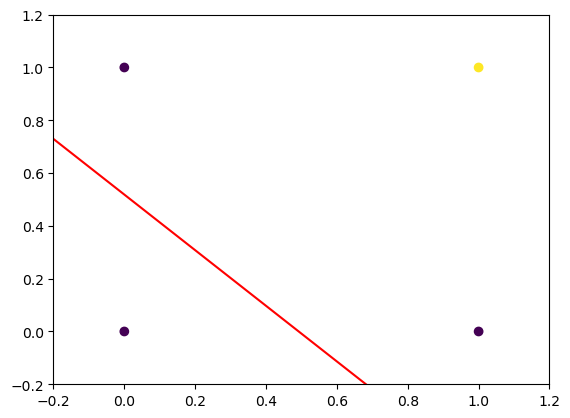

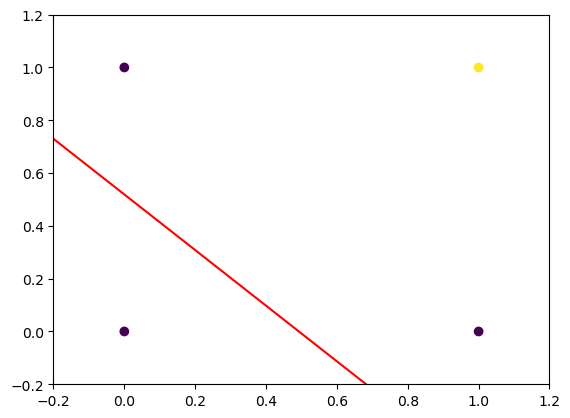

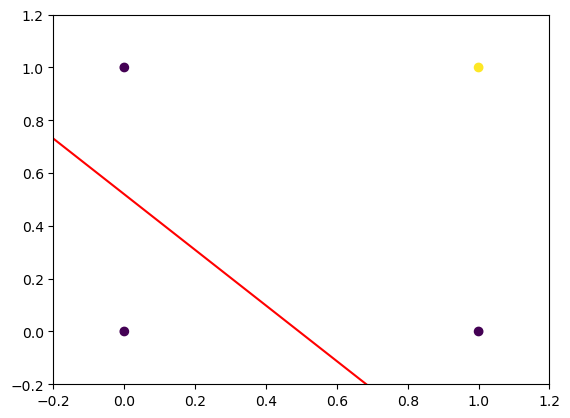

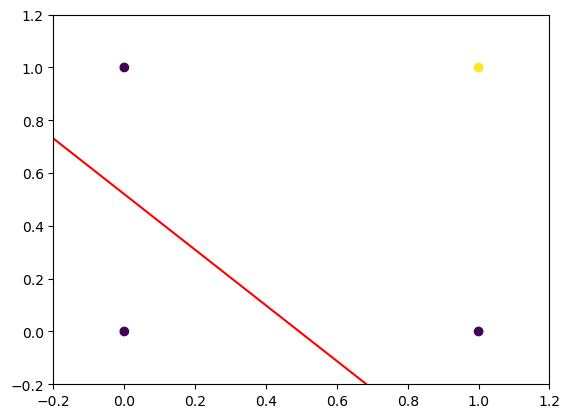

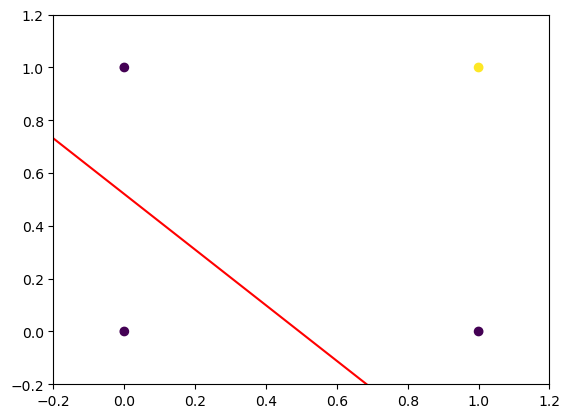

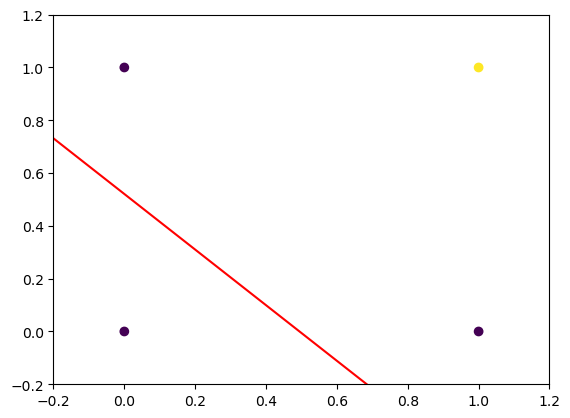

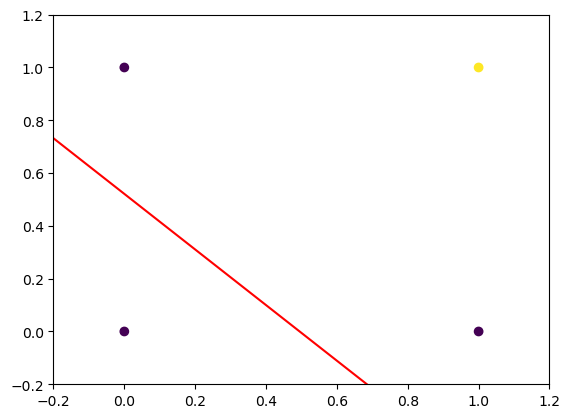

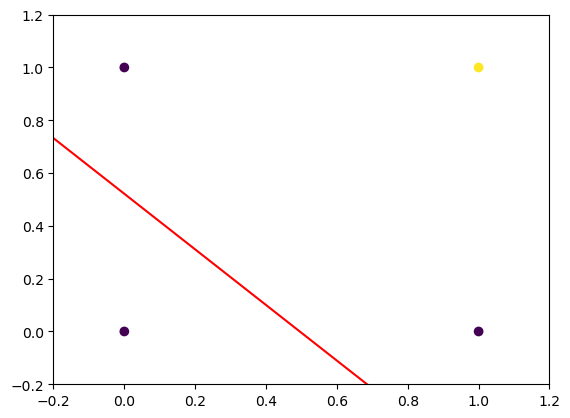

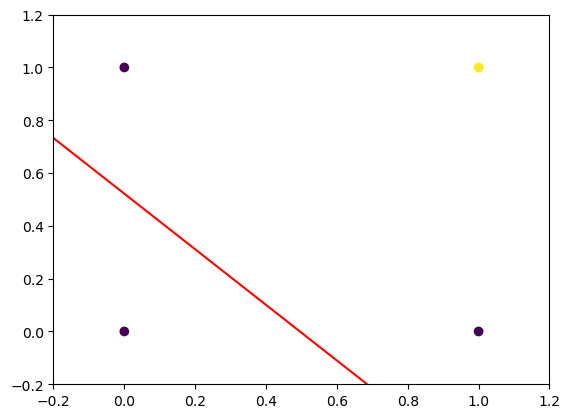

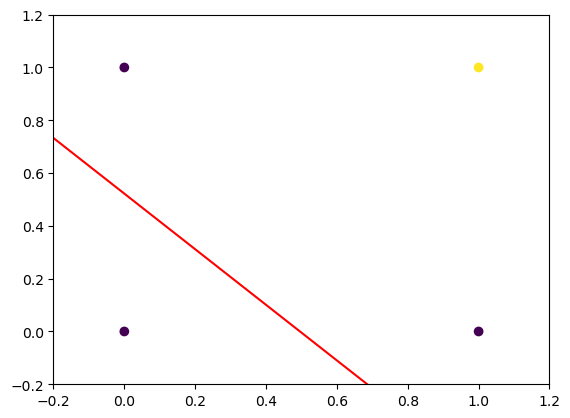

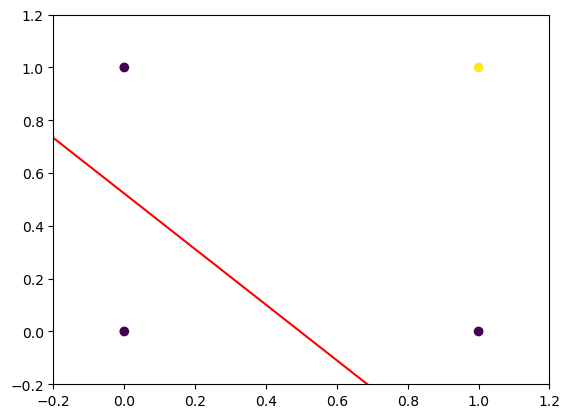

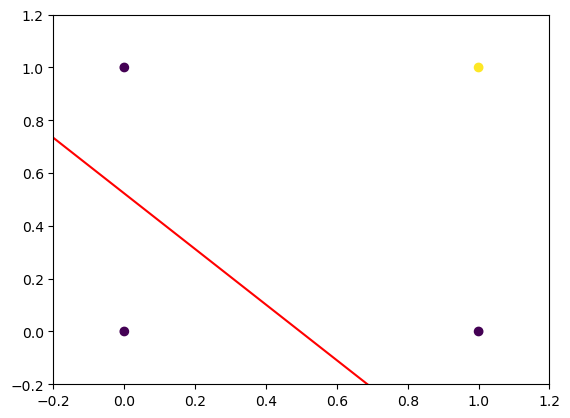

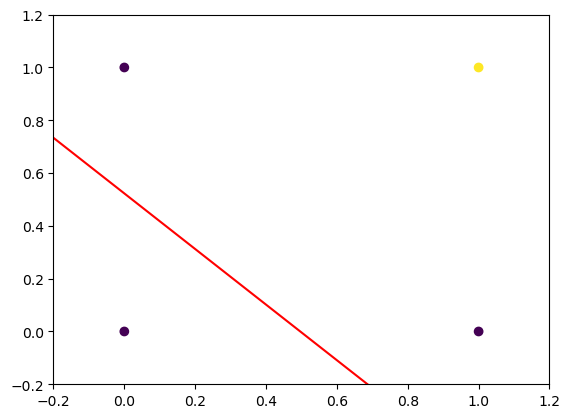

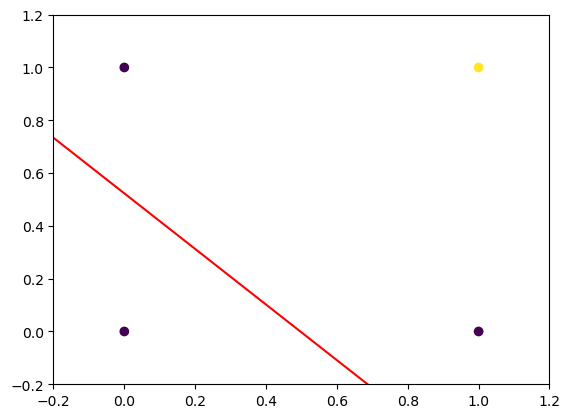

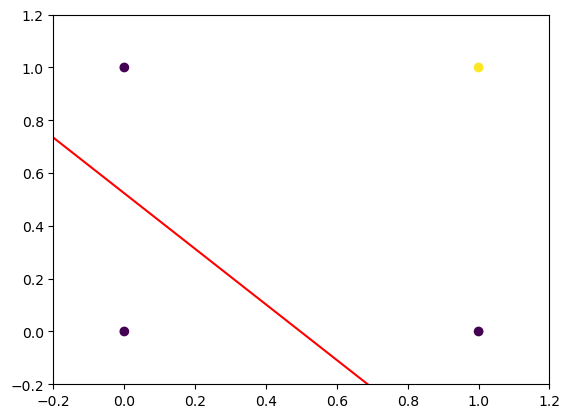

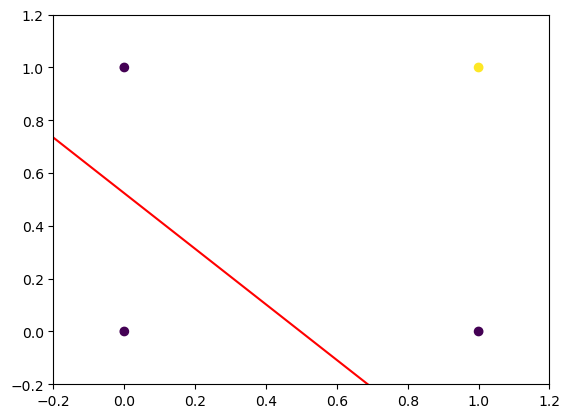

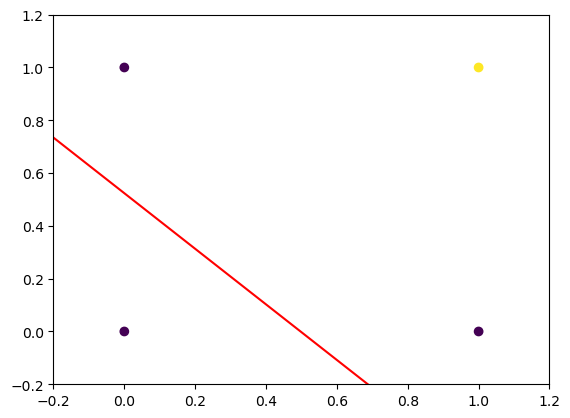

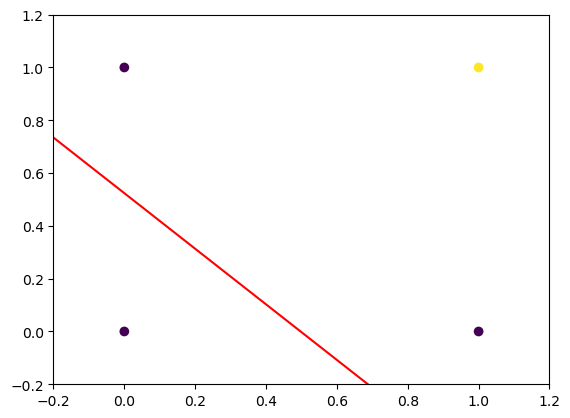

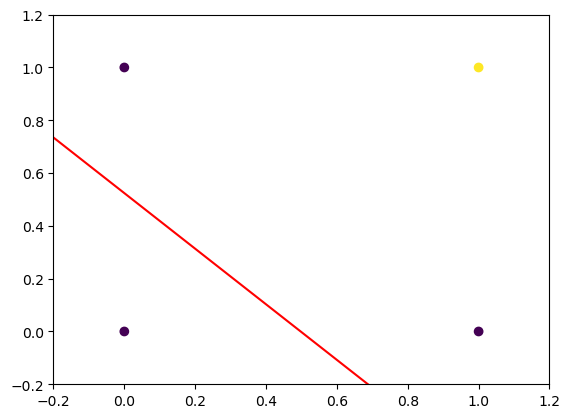

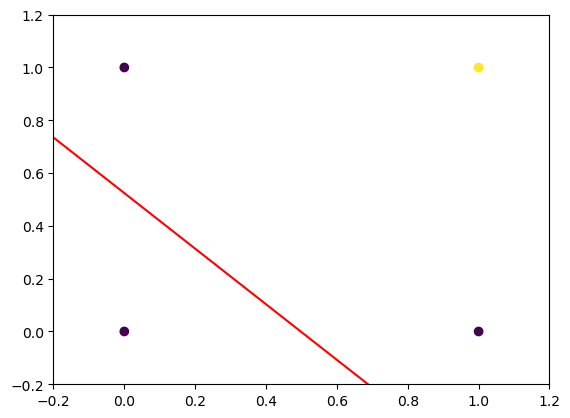

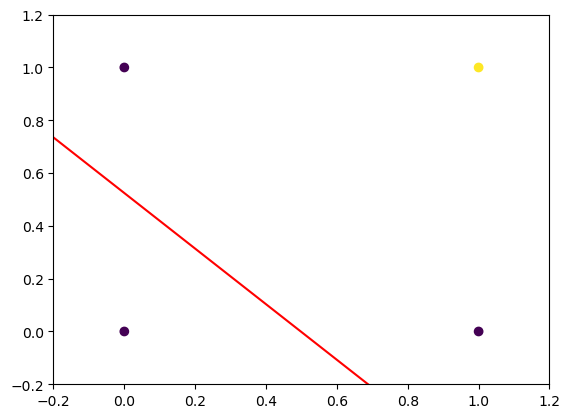

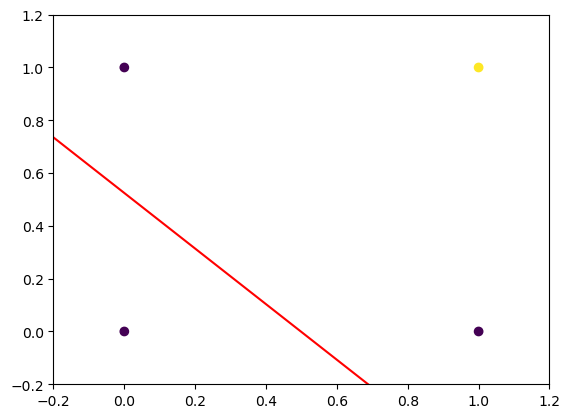

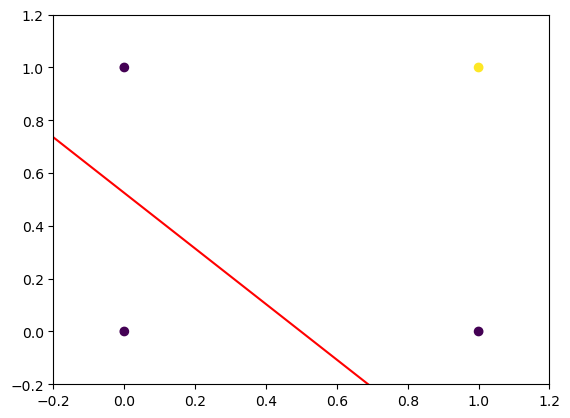

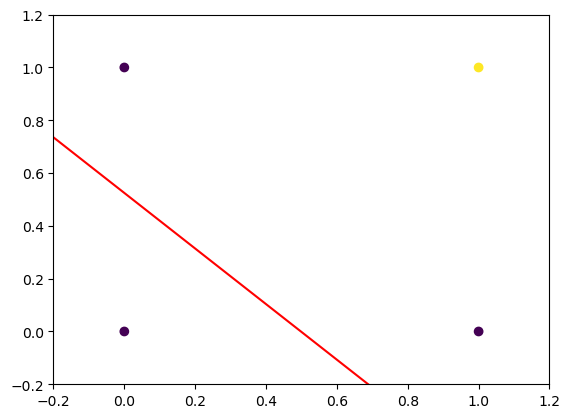

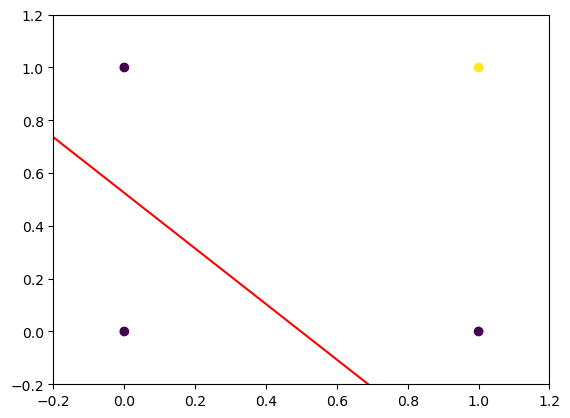

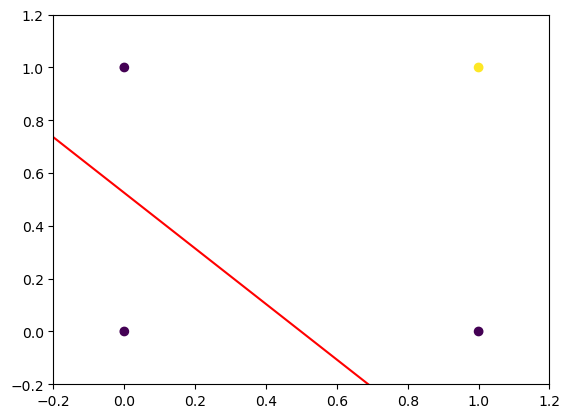

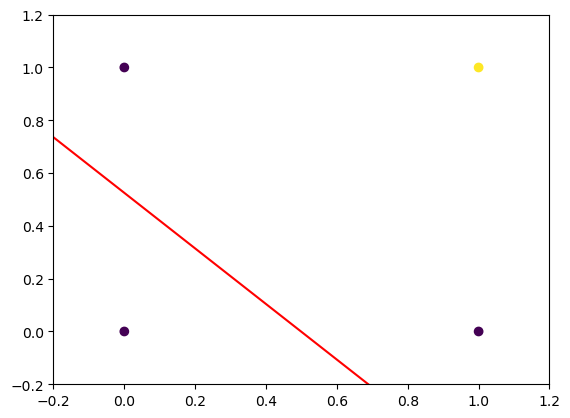

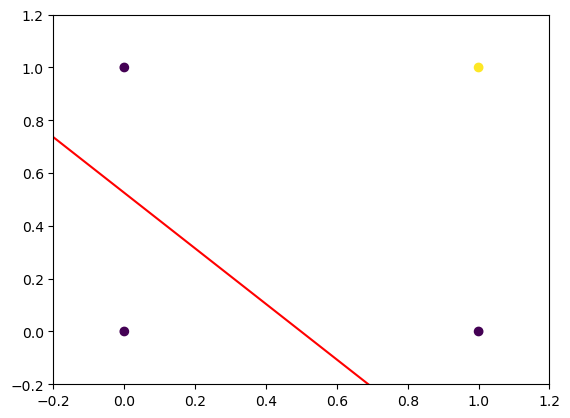

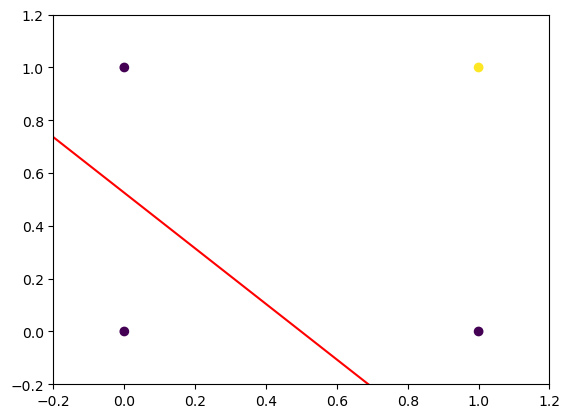

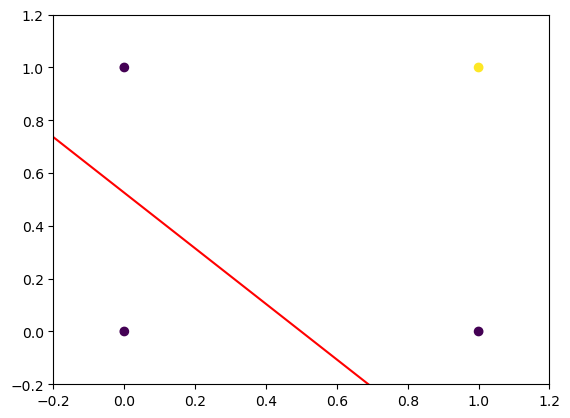

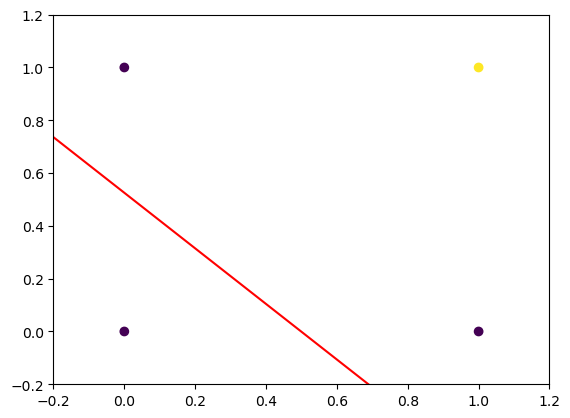

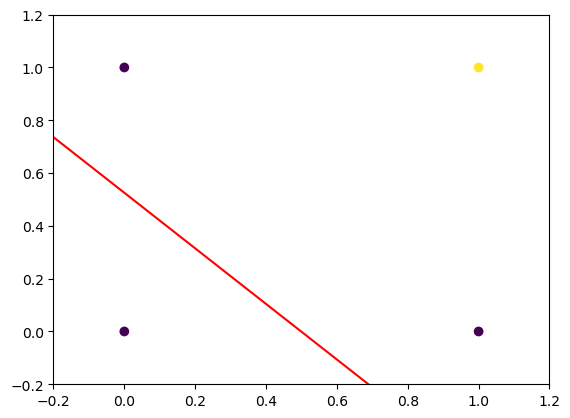

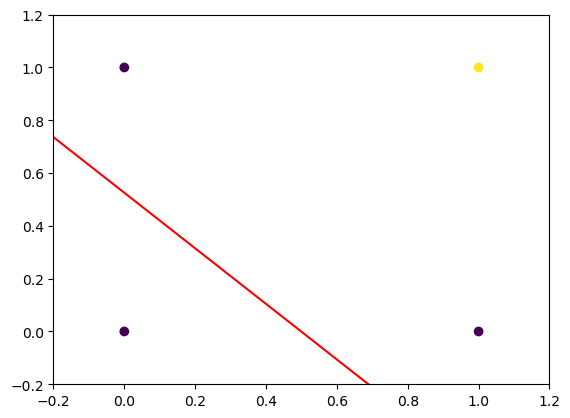

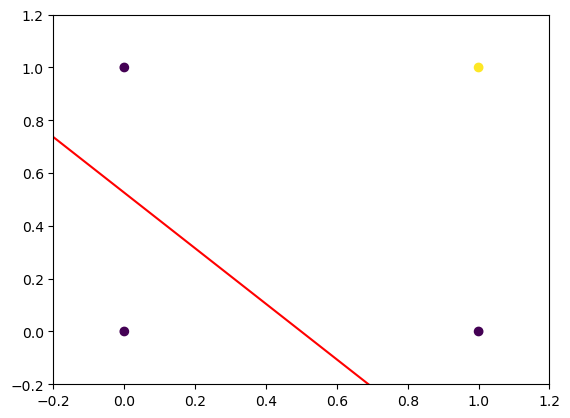

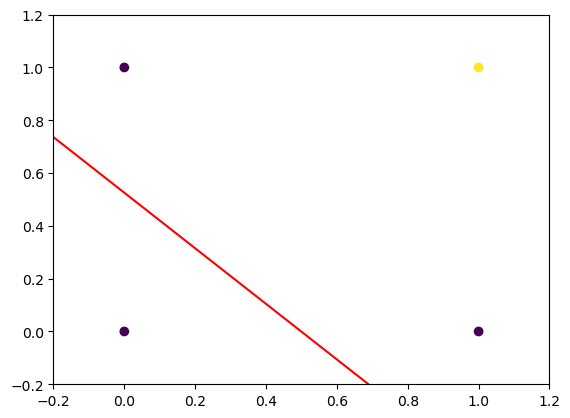

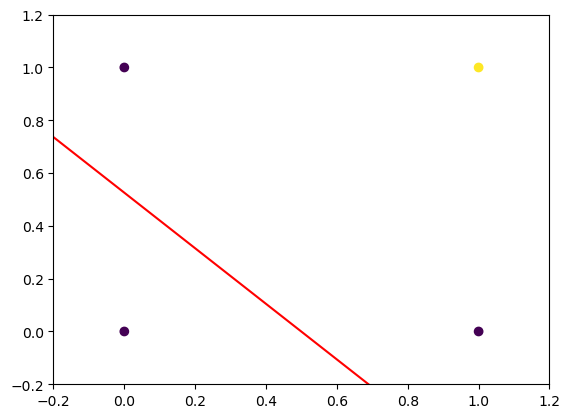

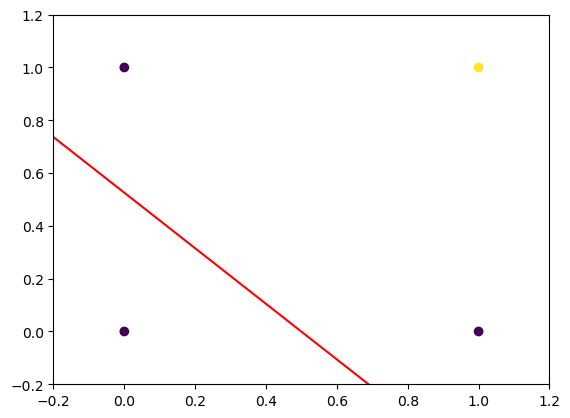

Final weights: [0.55514192 0.52734151]
Final bias: -0.27720415715508595


In [8]:
# Initialize the weights and bias
w = np.array([0.0, 0.0])
b = 0.0
learning_rate = 0.1

# Training the perceptron
for i in range(100):  # You can adjust the number of iterations
    error = 0
    for j in range(len(X)):
        input_data = X[j]
        target = y[j]

        # Calculate the predicted output
        predicted = np.dot(w, input_data) + b

        # Update the weights and bias
        w += learning_rate * (target - predicted) * input_data
        b += learning_rate * (target - predicted)

        error += abs(target - predicted)
        
    # Plot decision boundary
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y)
    x_boundary = np.linspace(-0.2, 1.2, 100)
    y_boundary = (-w[0] * x_boundary - b) / w[1]
    plt.plot(x_boundary, y_boundary, 'r')
    #plt.title(f'Epoch {i + 1}, Misclassified: {misclassified}')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.show(block=False)
    plt.pause(0.1)
    plt.close()
    # If the perceptron correctly classifies all examples, stop training
    if error == 0:
        print("Perceptron has converged.")
        break

# Print the final weights and bias
print("Final weights:", w)
print("Final bias:", b)

# Decision boundary: w1 * x1 + w2 * x2 + b = 0






In [4]:
# Testing  the trained perceptron
for j in range(len(X)):
    input_data = X[j]
    predicted = np.dot(w, input_data) + b
    print(f"Input: {input_data}, Predicted: {int(predicted > 0.5)}")

Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


### SVM without inbuilt

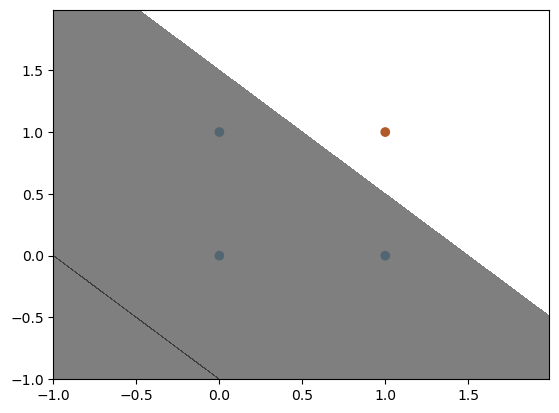

In [5]:
# Initialize weights and bias
w = np.zeros(2)
b = 0

# Learning rate
learning_rate = 0.4




for _ in range(100):
    for i in range(len(X)):
        # Check if the point is misclassified
        if y[i] * (np.dot(X[i], w) - b) <= 0:
            # Update the weights and bias
            w = w + learning_rate * y[i] * X[i]
            b = b - learning_rate * y[i]

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) - b
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

### This is using inbuilt functions

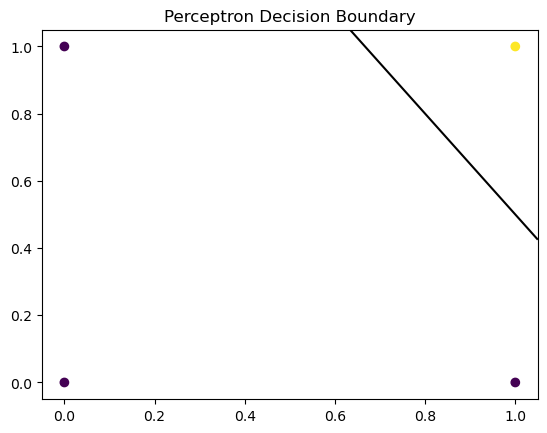

C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_13568\2975352237.py:37: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])


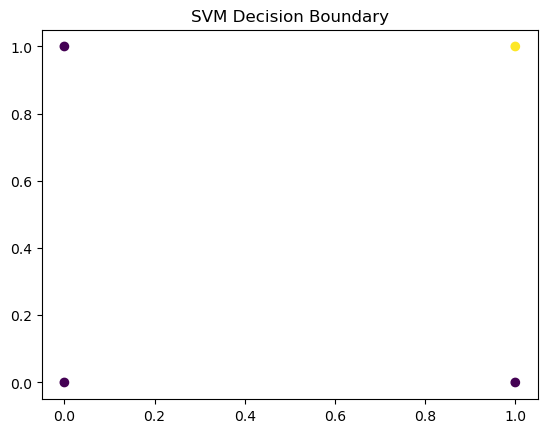

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

# Train a Perceptron
perceptron = Perceptron(max_iter=100, tol=None)
perceptron.fit(X, y)

# Train an SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot the decision boundary for the Perceptron
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

plt.title('Perceptron Decision Boundary')
plt.show()

# Plot the decision boundary for the SVM
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

plt.title('SVM Decision Boundary')
plt.show()